<a href="https://colab.research.google.com/github/sepse/COVAir-Balkans/blob/main/balkan_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Balkan COVID dataset

In the following cell we import the necessary libraries for data processing and visualization

In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import folium

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

We next load the dataset containing the worldwide dataset rearding COVID, and get an initial sample to see what kind of data it contains.

In [2]:
covid = '/content/drive/MyDrive/Colab Notebooks/Balkan Air&COVID/covid/owid-covid-data.csv'

In [3]:
cov = pd.read_csv(covid, sep=',')

In [4]:
cov = cov.drop(['iso_code', 'continent'], axis=1)
cov.sample(10)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
150702,Seychelles,2021-02-11,1695.0,120.0,64.571,7.0,0.0,0.286,17136.791,1213.224,...,7.1,35.7,NaN,3.60,73.40,0.796,NaN,NaN,NaN,NaN
45661,Denmark,2021-12-24,685036.0,11229.0,12081.143,3187.0,14.0,10.429,117839.397,1931.604,...,19.3,18.8,NaN,2.50,80.90,0.940,NaN,NaN,NaN,NaN
31430,Cape Verde,2021-08-21,34686.0,41.0,48.857,302.0,0.0,0.429,61729.735,72.967,...,2.1,16.5,NaN,2.10,72.98,0.665,NaN,NaN,NaN,NaN
122121,Nicaragua,2020-08-28,4494.0,0.0,26.143,137.0,0.0,0.571,670.508,0.000,...,NaN,NaN,NaN,0.90,74.48,0.660,NaN,NaN,NaN,NaN
133966,Paraguay,2020-11-06,66481.0,703.0,555.000,1472.0,10.0,12.143,9208.353,97.373,...,5.0,21.6,79.602,1.30,74.25,0.728,NaN,NaN,NaN,NaN
79500,Indonesia,2021-10-24,4240019.0,623.0,751.571,143205.0,29.0,36.143,15342.277,2.254,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
17674,Belize,2021-06-22,13059.0,20.0,10.000,329.0,0.0,0.429,32251.213,49.393,...,NaN,NaN,90.083,1.30,74.62,0.716,NaN,NaN,NaN,NaN
36832,Comoros,2020-12-31,823.0,58.0,15.429,10.0,1.0,0.429,926.326,65.282,...,4.4,23.6,15.574,2.20,64.32,0.554,NaN,NaN,NaN,NaN
149026,Senegal,2020-12-15,17216.0,70.0,88.571,350.0,0.0,1.429,1001.145,4.071,...,0.4,16.6,20.859,NaN,67.94,0.512,NaN,NaN,NaN,NaN
16664,Belgium,2020-11-16,537871.0,1932.0,4955.571,14616.0,195.0,200.000,46239.302,166.089,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN


In the following cell we can get an idea about the data types of the variables, and see if we need to convert them for further processing. The date format, for instance, is of 'object' type and needs to be converted to 'Datetime' in order to be recognized as a date.

In [5]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188788 entries, 0 to 188787
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   location                                    188788 non-null  object 
 1   date                                        188788 non-null  object 
 2   total_cases                                 181315 non-null  float64
 3   new_cases                                   181040 non-null  float64
 4   new_cases_smoothed                          179866 non-null  float64
 5   total_deaths                                162915 non-null  float64
 6   new_deaths                                  162903 non-null  float64
 7   new_deaths_smoothed                         161741 non-null  float64
 8   total_cases_per_million                     180478 non-null  float64
 9   new_cases_per_million                       180203 non-null  float64
 

In [6]:
cov['date'] = pd.to_datetime(cov['date'])

In [7]:
print(f"The available data is between {cov['date'].min()} and {cov['date'].max()}")

The available data is between 2020-01-01 00:00:00 and 2022-05-23 00:00:00


From the general dataset, we are interested only in the Balkan countries, so we create a subset containing the locations we are interested in.

In [8]:
balkan = (cov.loc[cov['location'].isin(['Albania','Kosovo', 'North Macedonia', 'Serbia', 'Bosnia and Herzegovina', 'Croatia'])])
 
balkan.sample(10)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
40625,Croatia,2021-07-12,360841.0,15.0,85.000,8229.0,2.0,1.429,88405.518,3.675,...,34.3,39.9,NaN,5.540,78.49,0.851,NaN,NaN,NaN,NaN
1671,Albania,2020-03-16,51.0,9.0,7.000,1.0,0.0,0.143,17.752,3.133,...,7.1,51.2,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
90526,Kosovo,2020-09-05,14027.0,117.0,116.000,556.0,5.0,6.857,7870.985,65.652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149734,Serbia,2020-08-27,31099.0,125.0,127.143,707.0,0.0,2.571,4525.764,18.191,...,37.7,40.2,97.719,5.609,76.00,0.806,NaN,NaN,NaN,NaN
91126,Kosovo,2022-04-28,228023.0,19.0,14.571,3138.0,0.0,0.000,127950.778,10.661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1811,Albania,2020-08-03,5620.0,101.0,105.714,172.0,6.0,4.000,1956.188,35.156,...,7.1,51.2,NaN,2.890,78.57,0.795,NaN,NaN,NaN,NaN
22121,Bosnia and Herzegovina,2020-07-04,4962.0,0.0,146.714,191.0,0.0,1.857,1520.473,0.000,...,30.2,47.7,97.164,3.500,77.40,0.780,NaN,NaN,NaN,NaN
40346,Croatia,2020-10-06,18084.0,287.0,243.429,304.0,4.0,4.143,4430.554,70.315,...,34.3,39.9,NaN,5.540,78.49,0.851,NaN,NaN,NaN,NaN
126066,North Macedonia,2020-05-19,1839.0,22.0,23.571,106.0,2.0,2.000,883.005,10.563,...,NaN,NaN,NaN,4.280,75.80,0.774,NaN,NaN,NaN,NaN
150088,Serbia,2021-08-16,733332.0,1288.0,982.571,7174.0,7.0,4.429,106720.073,187.440,...,37.7,40.2,97.719,5.609,76.00,0.806,NaN,NaN,NaN,NaN


With so many datapoints available, it is practical to get an idea of any correlation between variables, to see if it gives us any insight about which factors are worth exploring. 

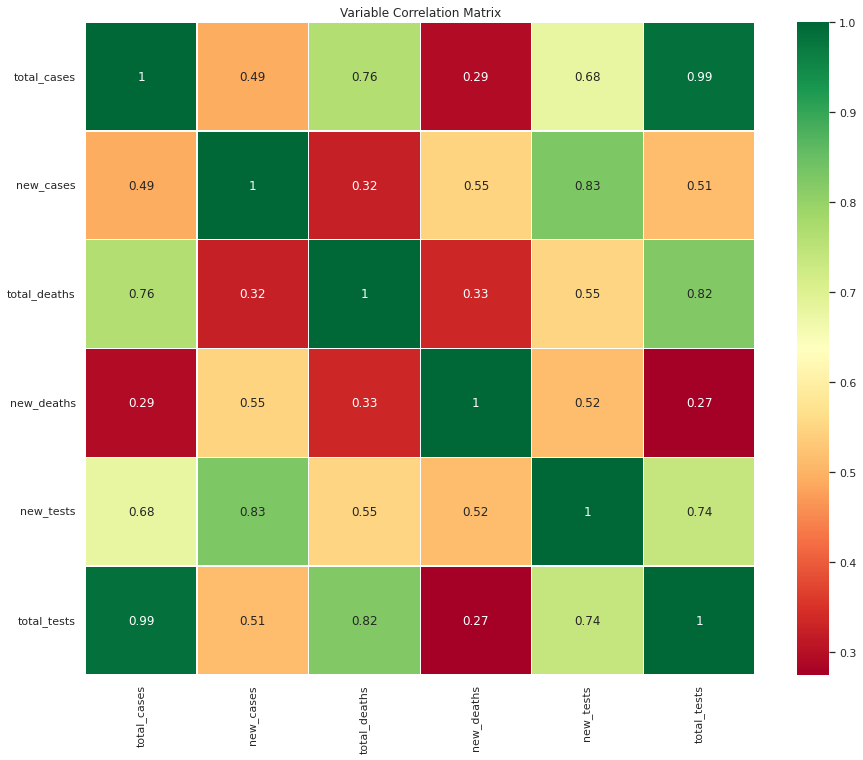

In [9]:
bal = balkan[['date','total_cases','new_cases','total_deaths','new_deaths','new_tests','total_tests']]

sns.heatmap(bal.corr(),annot=True,cmap='RdYlGn',linewidths=0.2).set_title("Variable Correlation Matrix") 
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.show()

We continue to further visualize the identified features in other forms of graphics in order to get a different perspective, and see if any potential patterns emerge. In the following cell we plot 'New cases', 'New tests' and 'Total deaths', cumulatively for all 6 countries.

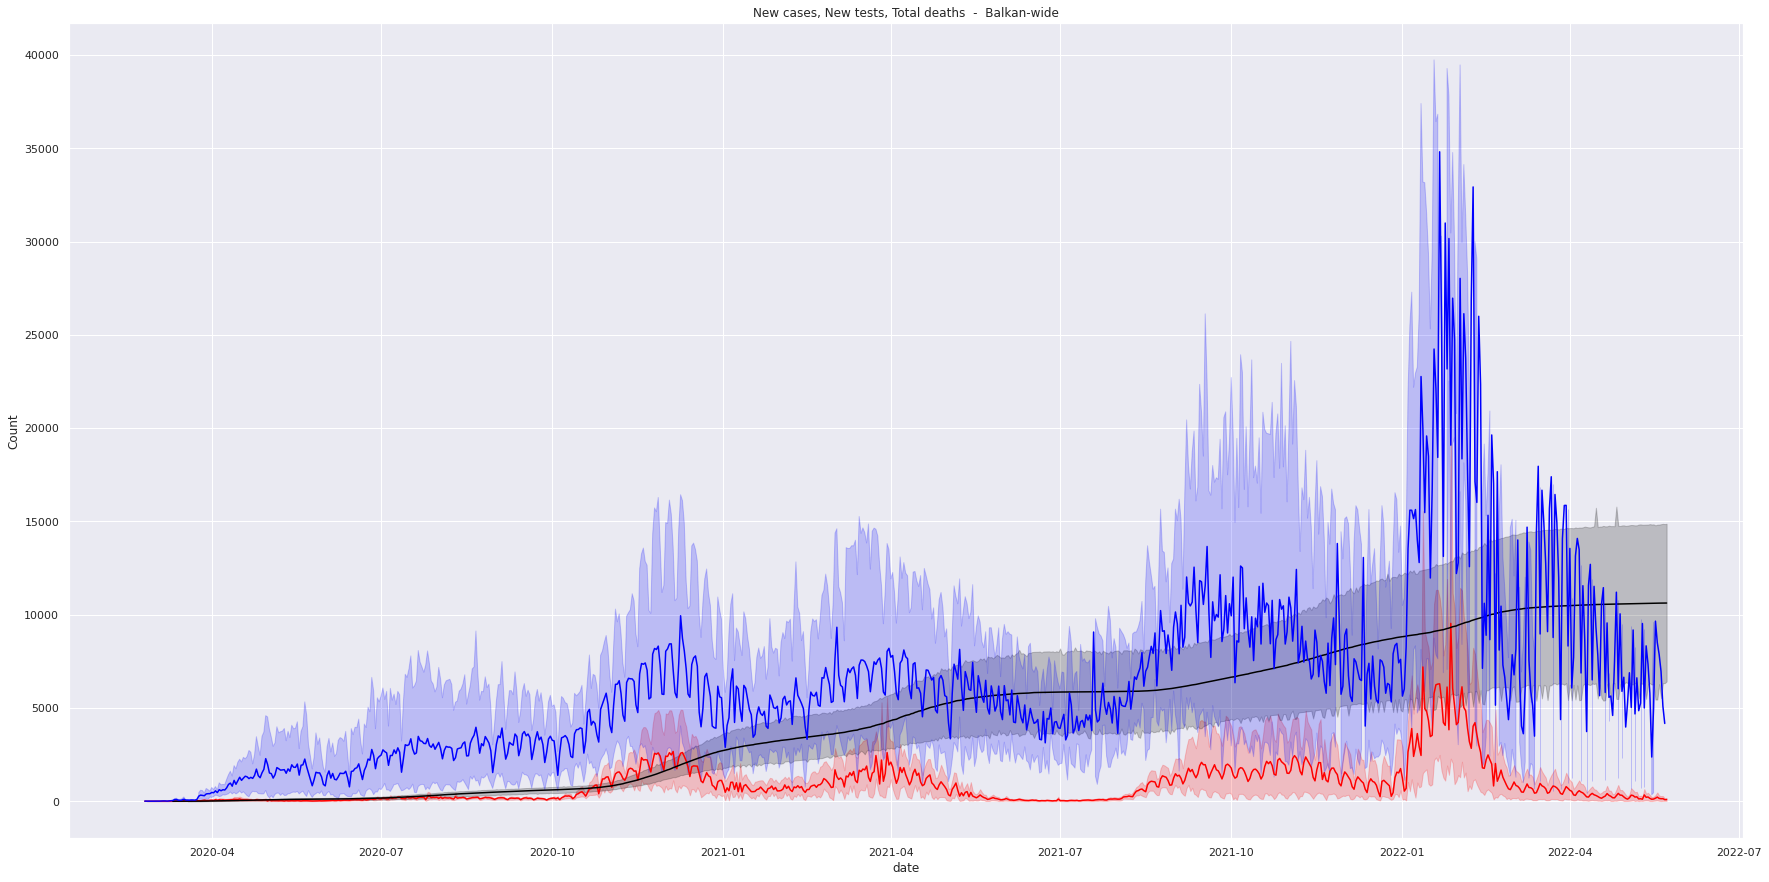

In [10]:
sns.set_style('darkgrid')

# Construct plot
#sns.lineplot(x = "date", y = "total_cases", data = kos)
sns.set(rc={'figure.figsize':(30,15)})
#plt.show()

sns.lineplot(x="date", y="new_cases", data=bal, color='red').set_title("New cases, New tests, Total deaths  -  Balkan-wide")
sns.lineplot(x="date", y="total_deaths", data=bal, color='black')
sns.lineplot(x="date", y="new_tests", data=bal, color='blue')
# set label
plt.ylabel("Count")

plt.show()

Below we can plot 'New Cases' for individual Balkan countries, and see how countries compare to one another in that perspective.

Text(0.5, 1.0, 'Croatia')

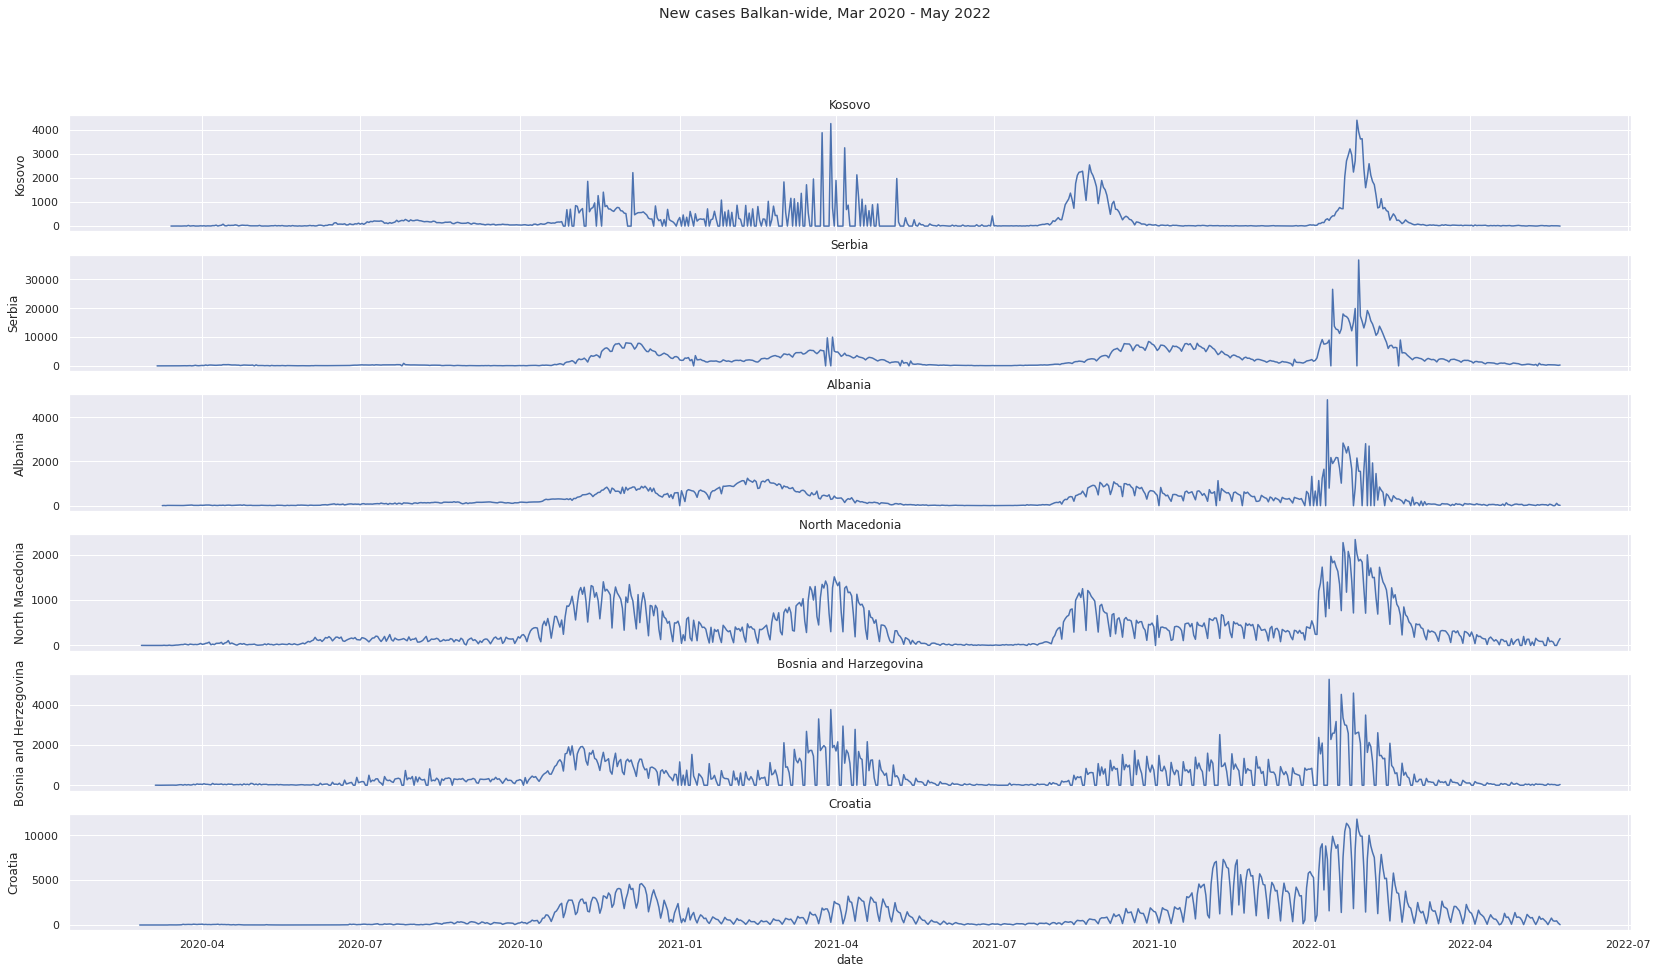

In [11]:
bal_pivot = balkan.pivot(index='date', columns='location', values='new_cases')

fig, axes = plt.subplots(6, 1, figsize=(28, 15), sharex=True)
fig.suptitle('New cases Balkan-wide, Mar 2020 - May 2022')

sns.lineplot(ax=axes[0], x=bal_pivot.index, y=bal_pivot['Kosovo'], data=bal_pivot).set_title("Kosovo")
sns.lineplot(ax=axes[1], x=bal_pivot.index, y=bal_pivot['Serbia'], data=bal_pivot).set_title("Serbia")
sns.lineplot(ax=axes[2], x=bal_pivot.index, y=bal_pivot['Albania'], data=bal_pivot).set_title("Albania")
sns.lineplot(ax=axes[3], x=bal_pivot.index, y=bal_pivot['North Macedonia'], data=bal_pivot).set_title("North Macedonia")
sns.lineplot(ax=axes[4], x=bal_pivot.index, y=bal_pivot['Bosnia and Herzegovina'], data=bal_pivot).set_title("Bosnia and Harzegovina")
sns.lineplot(ax=axes[5], x=bal_pivot.index, y=bal_pivot['Croatia'], data=bal_pivot).set_title("Croatia")

We further continue to plot the variables 'New tests' vs 'New cases', as a means of investigating relationships between them. Histograms can give as an idea of where the most of datapoints reside.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


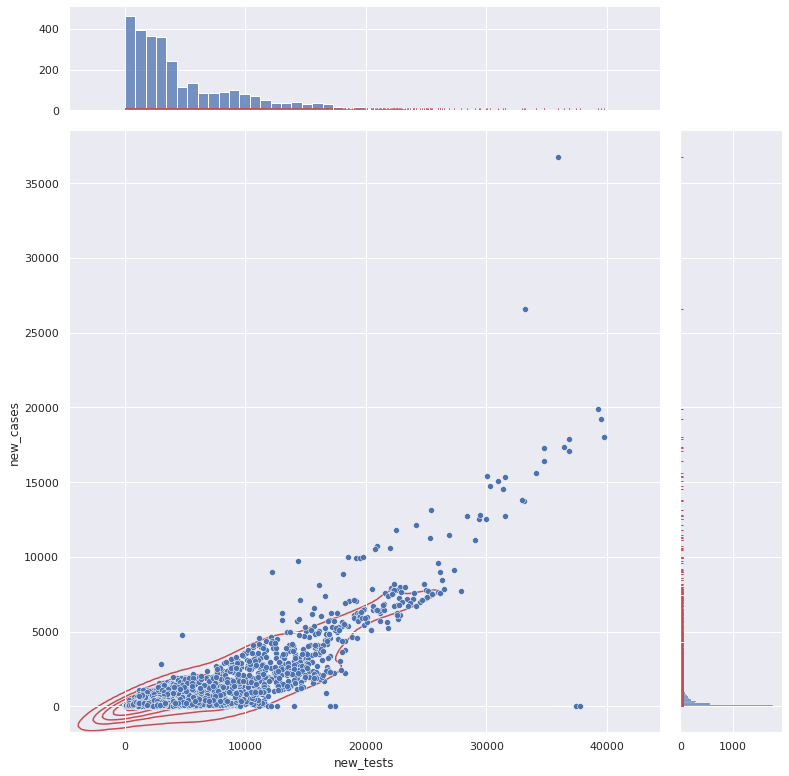

In [12]:
h = sns.jointplot("new_tests", "new_cases", data=balkan, marginal_ticks=True, height=11)
h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
h.plot_marginals(sns.rugplot, color="r", clip_on=False)

In the following cell we can plot the relationship between other variables as well by using Pairgrid method, and see if any significant relationships can be found.

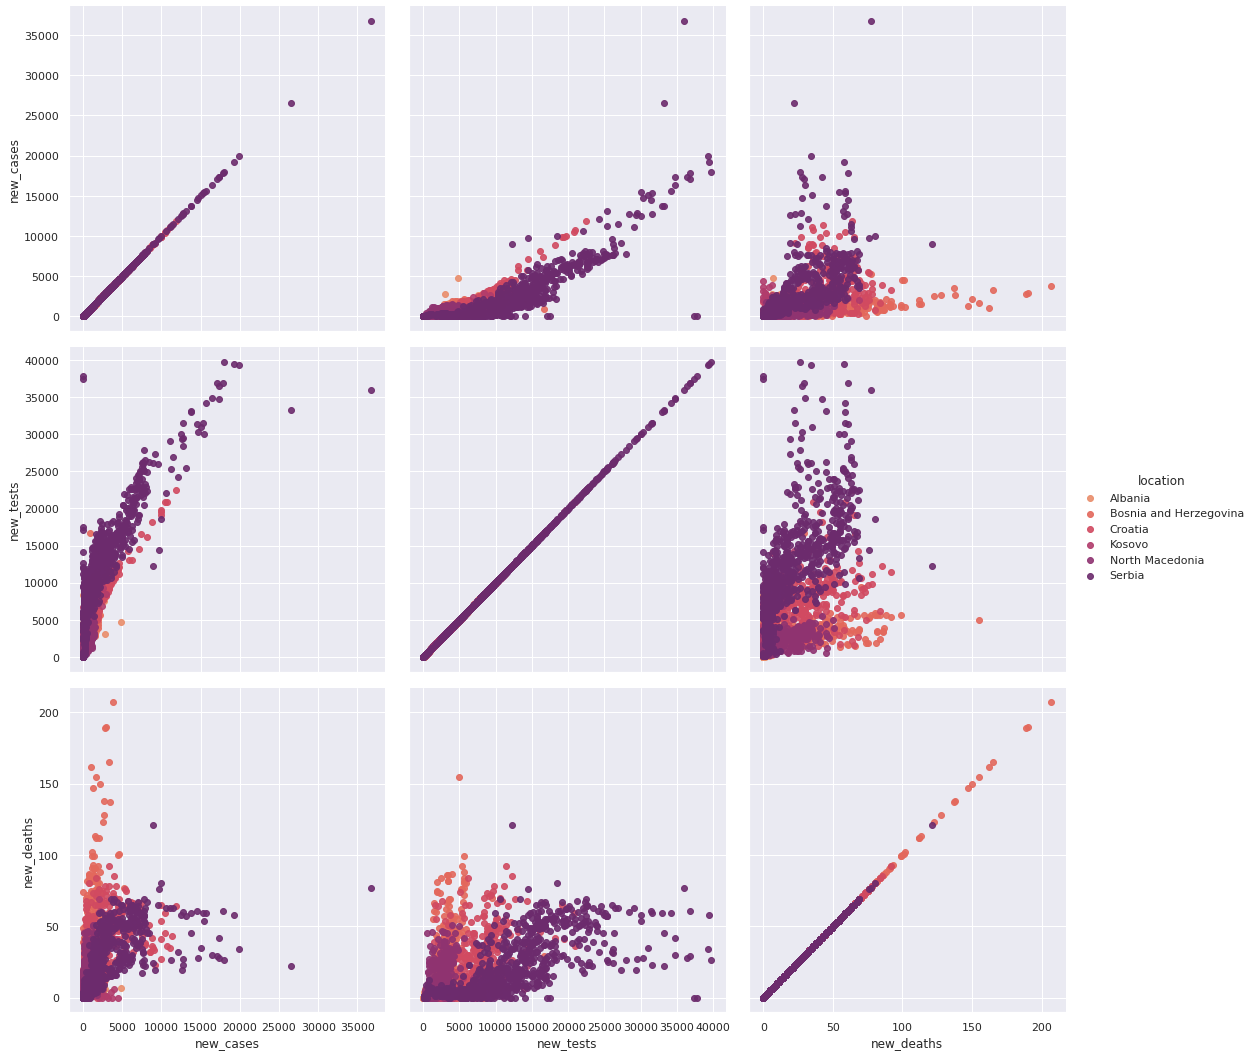

In [13]:

g = sns.PairGrid(data=balkan, vars=['new_cases', 'new_tests', 'new_deaths'], hue='location', palette="flare", height=5)
g.map(plt.scatter, alpha=0.9)
g.add_legend();

Besides from exploring data and deriving informative graphics, we can slightly see some country profiles emerging in the way some variables relate to one another. It is obvious that with increase of testing significantly more new cases will emerge, as correlations indicate. Seeing how those correlations vary between countries is intriguing and provides some insight into further questions that belong to a different domain from data science.